In [1]:
cd executible/

/Users/alexeygilman/repos/Cu_transition_time_course-/executible


In [2]:
%run Cu_transition_functionalized.py

In [3]:
df1_raw_FM40 = raw_data_cleanup("5G_counts.tsv")


columns = ['5GB1_FM40_T0m_TR2', '5GB1_FM40_T10m_TR3', '5GB1_FM40_T20m_TR2', '5GB1_FM40_T40m_TR1',
           '5GB1_FM40_T60m_TR1', '5GB1_FM40_T90m_TR2', '5GB1_FM40_T150m_TR1_remake', '5GB1_FM40_T180m_TR1']

df2_TPM = TPM_counts(df1_raw_FM40, "start_coord", "end_coord",columns, remove_zero = True)  #TPM counts
df2_TPM_log2 = log_2_transform(df2_TPM, "5GB1_FM40_T0m_TR2","5GB1_FM40_T180m_TR1") #TPM log 2 transformed 
df2_TPM_mean = mean_center(df2_TPM, "5GB1_FM40_T0m_TR2","5GB1_FM40_T180m_TR1") #TPM mean centered 

df3_pearson_r = congruency_table(df2_TPM, "5GB1_FM40_T0m_TR2" , "5GB1_FM40_T180m_TR1", step = df2_TPM.shape[0])
df3_euclidean_mean = euclidean_distance(df2_TPM_mean, "5GB1_FM40_T0m_TR2" , "5GB1_FM40_T180m_TR1")
df3_euclidean_log2 = euclidean_distance(df2_TPM_mean, "5GB1_FM40_T0m_TR2" , "5GB1_FM40_T180m_TR1" )

print("The shape of the TPM table is ", df2_TPM.shape)
print("The shape of the pearson_r matrix is ", df3_pearson_r.shape)



5G_counts.tsv was located in the directory
5G_counts.tsv was imported into dataframe
QC columns were removed from dataframe
All non FM40 data were removed from dataframe
All FM40 columns were sorted by timecourse sequence
Clean-up of raw data complete
The shape of the TPM table is  (4480, 16)
The shape of the pearson_r matrix is  (4480, 4480)


### Historgram of raw data (TPM)

In [4]:
%matplotlib inline

In [5]:
df2_TPM_values = df2_TPM.loc[:,"5GB1_FM40_T0m_TR2":"5GB1_FM40_T180m_TR1"]
df2_TPM_values

,5GB1_FM40_T0m_TR2,5GB1_FM40_T10m_TR3,5GB1_FM40_T20m_TR2,5GB1_FM40_T40m_TR1,5GB1_FM40_T60m_TR1,5GB1_FM40_T90m_TR2,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1
locus_tag,,,,,,,,
MBURv2_100001,24.037381,19.388720,19.472578,20.618024,22.190693,20.189929,23.793199,21.197329
MBURv2_100002,7.344755,6.717352,3.700437,5.487055,3.996920,5.438920,4.915027,4.634447
MBURv2_100003,5.293517,3.812551,8.308673,2.372780,3.703710,2.939957,5.977735,0.939415
MBURv2_10001,14.858356,21.889301,17.962332,17.028791,13.191805,11.878101,11.058811,7.491024
MBURv2_10002,89.572248,87.557206,79.063709,99.523823,76.788120,104.245961,95.143906,105.923083
MBURv2_10003,113.068430,88.417142,98.559710,86.786918,104.395747,100.544474,111.386799,95.223404
MBURv2_10004,25.648352,24.401808,24.747034,26.128833,25.869279,27.132933,25.879122,21.871753
MBURv2_10005,22.297302,20.984785,19.619608,18.773890,21.282302,23.224037,22.635527,23.842506
MBURv2_10006,36.396059,26.023126,22.323652,44.069260,24.098416,39.400048,36.049981,41.600548


In [6]:
df2_TPM_values.describe()

,5GB1_FM40_T0m_TR2,5GB1_FM40_T10m_TR3,5GB1_FM40_T20m_TR2,5GB1_FM40_T40m_TR1,5GB1_FM40_T60m_TR1,5GB1_FM40_T90m_TR2,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1
count,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000
mean,223.212355,223.212637,223.212795,223.214017,223.212380,223.212530,223.213161,223.213154
std,1152.060115,1148.631981,1199.539401,1197.234575,1273.559525,1210.463857,1113.872291,1323.682884
min,0.046969,0.048326,0.040957,0.052634,0.054771,0.043477,0.017680,0.041677
25%,28.773103,27.152989,26.820393,25.717298,23.940108,24.267359,24.899048,22.366498
50%,65.454814,61.283415,60.593187,58.463796,55.551369,55.484343,57.089228,52.620759
75%,136.247090,129.407769,129.317888,125.427803,125.157696,121.476406,126.784235,115.605307
max,38276.484324,33395.468885,38156.821484,40112.163709,53334.428836,45789.636731,34735.533389,55623.888672


In [ ]:
df2_TPM.loc[df2_TPM_values.idxmax()] #the highest expressed gene per column

In [8]:
top10index = df2_TPM_values.sort("5GB1_FM40_T0m_TR2", ascending = False).iloc[:10,:].index

/Users/alexeygilman/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [9]:
df2_TPM.loc[top10index,:]

,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,5GB1_FM40_T0m_TR2,5GB1_FM40_T10m_TR3,5GB1_FM40_T20m_TR2,5GB1_FM40_T40m_TR1,5GB1_FM40_T60m_TR1,5GB1_FM40_T90m_TR2,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1
locus_tag,,,,,,,,,,,,,,,,
MBURv2_200002,conserved protein of unknown function,CDS,NaN,MBURv2,4089082,4089993,Evidence 4 : Homologs of previously reported g...,NaN,38276.484324,33395.468885,38156.821484,34194.603990,29495.091672,26024.515218,25707.369485,19990.740574
MBURv2_210045,"Particulate methane monooxygenase, C subunit",CDS,pmoC,MBURv2,4145308,4146060,NaN,NaN,34771.145240,30260.438551,35975.798188,40112.163709,53334.428836,45789.636731,34735.533389,55623.888672
MBURv2_130051,Methane monooxygenase component A alpha chain,CDS,mmoX,MBURv2,2195408,2196985,NaN,NaN,20876.047754,23334.700740,23554.421849,14831.488460,5236.638378,1206.833556,8886.181868,116.863397
MBURv2_210294,Methanol dehydrogenase [cytochrome c] subunit 2,CDS,moxI,MBURv2,4428610,4428894,NaN,NaN,19513.752449,22060.136681,20446.725888,20908.798025,20034.727359,17919.427508,28439.225545,15807.184089
MBURv2_60380,Copper-repressible polypeptide,CDS,corA,MBURv2,1788771,1789478,NaN,NaN,14817.898886,13864.528615,14259.683730,13831.749325,15987.438513,13671.508292,12265.626813,10985.775012
MBURv2_210291,Methanol dehydrogenase [cytochrome c] subunit 1,CDS,moxF,MBURv2,4425383,4427191,NaN,NaN,13590.696508,17995.517973,13917.409231,15841.555101,15445.970422,13572.525008,17521.826598,11629.983396
MBURv2_130049,Methane monooxygenase regulatory protein B,CDS,mmoB,MBURv2,2193680,2194105,NaN,NaN,13526.005086,17575.288572,17778.694312,11085.860188,3487.855641,743.191354,5752.450643,99.746681
MBURv2_130048,Methane monooxygenase component A gamma chain,CDS,mmoZ,MBURv2,2193167,2193670,NaN,NaN,13506.480648,16596.656923,16160.640965,9796.221967,3227.173118,703.930027,5362.338302,93.619968
MBURv2_210002,conserved exported protein of unknown function,CDS,NaN,MBURv2,4091448,4091843,Evidence 4 : Homologs of previously reported g...,NaN,13158.834189,12324.813785,11666.985452,11869.829886,13053.837277,13239.511781,12188.596640,8935.398178


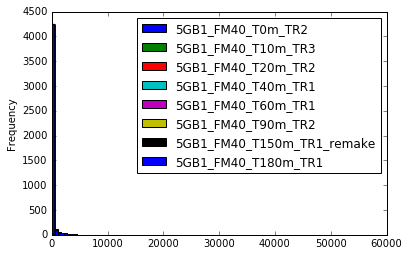

In [10]:
df2_TPM_values.plot.hist(bins=100)

In [11]:
import matplotlib.pyplot as plt 
plt.style.use("seaborn-white")


(array([  9.31399724e-03,   4.00489842e-03,   1.50484660e-03,
          9.02907961e-04,   4.25369973e-04,   2.96956396e-04,
          2.36762532e-04,   1.04336031e-04,   9.22972583e-05,
          1.16374804e-04,   5.21680155e-05,   4.41421670e-05,
          4.01292427e-05,   5.21680155e-05,   4.41421670e-05,
          3.21033942e-05,   3.61163184e-05,   2.80904699e-05,
          2.40775456e-05,   1.60516971e-05,   2.40775456e-05,
          1.60516971e-05,   1.20387728e-05,   1.60516971e-05,
          1.20387728e-05,   1.60516971e-05,   1.20387728e-05,
          1.20387728e-05,   1.20387728e-05,   8.02584854e-06,
          1.60516971e-05,   3.21033942e-05,   8.02584854e-06,
          8.02584854e-06,   1.20387728e-05,   4.01292427e-06,
          1.20387728e-05,   8.02584854e-06,   2.00646214e-05,
          2.00646214e-05,   8.02584854e-06,   8.02584854e-06,
          2.80904699e-05,   1.60516971e-05,   8.02584854e-06,
          1.60516971e-05,   1.20387728e-05,   8.02584854e-06,
        

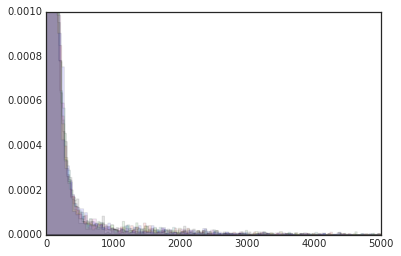

In [12]:
"""
columns = ['5GB1_FM40_T0m_TR2', '5GB1_FM40_T10m_TR3', '5GB1_FM40_T20m_TR2', '5GB1_FM40_T40m_TR1',
           '5GB1_FM40_T60m_TR1', '5GB1_FM40_T90m_TR2', '5GB1_FM40_T150m_TR1_remake', '5GB1_FM40_T180m_TR1']
"""

x1 = df2_TPM_values["5GB1_FM40_T0m_TR2"]
x2 = df2_TPM_values['5GB1_FM40_T10m_TR3']
x3 = df2_TPM_values['5GB1_FM40_T20m_TR2']
x4 = df2_TPM_values['5GB1_FM40_T40m_TR1']
x5 = df2_TPM_values['5GB1_FM40_T60m_TR1']
x6 = df2_TPM_values['5GB1_FM40_T90m_TR2']
x7 = df2_TPM_values['5GB1_FM40_T150m_TR1_remake']
x8 = df2_TPM_values['5GB1_FM40_T180m_TR1']


kwargs = dict(histtype = "stepfilled", alpha = 0.1, normed = True, bins = 1000) 

axes = plt.gca()
axes.set_xlim([0,5000])
axes.set_ylim([0,0.001])

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.hist(x4, **kwargs)
plt.hist(x5, **kwargs)
plt.hist(x6, **kwargs)
plt.hist(x7, **kwargs)
plt.hist(x8, **kwargs)

###  Standard scale across rows and replot historgram

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [14]:
#will start with standard scalar - need to scale along rows, therefore transposing the data to complete standard scale. 

df2_TPM_values_T = df2_TPM_values.T #transposing the data
standard_scaler = StandardScaler()

df2a_stand_scale = standard_scaler.fit_transform(df2_TPM_values_T)
df2a_stand_scale = pd.DataFrame(df2a_stand_scale.T)

df2a_stand_scale.columns = df2_TPM_values.columns
df2a_stand_scale.index = df2_TPM_values.index

In [15]:
df2a_stand_scale.describe()

,5GB1_FM40_T0m_TR2,5GB1_FM40_T10m_TR3,5GB1_FM40_T20m_TR2,5GB1_FM40_T40m_TR1,5GB1_FM40_T60m_TR1,5GB1_FM40_T90m_TR2,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1
count,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000,4480.000000
mean,0.702837,0.197448,0.068517,-0.042205,-0.281593,-0.167623,-0.026290,-0.451091
std,0.995684,0.872936,0.894152,0.771213,0.935251,0.952852,0.960458,1.139213
min,-2.098707,-2.370383,-2.298431,-2.347316,-2.464224,-2.392335,-2.502359,-2.568586
25%,-0.060390,-0.467155,-0.687562,-0.599912,-0.982392,-0.946406,-0.709415,-1.373641
50%,0.915573,0.260343,0.166170,-0.075194,-0.328976,-0.334578,-0.063412,-0.727074
75%,1.512664,0.846053,0.790491,0.462960,0.365077,0.576012,0.637181,0.354870
max,2.571021,2.402075,2.449422,2.415837,2.336944,2.556948,2.524248,2.601184


(array([ 0.04780028,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.04780028,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.04780028,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.04780028,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.09560055,  0.        ,  0.04780028,  0.09560055,
         0.        ,  0.        ,  0.        ,  0. 

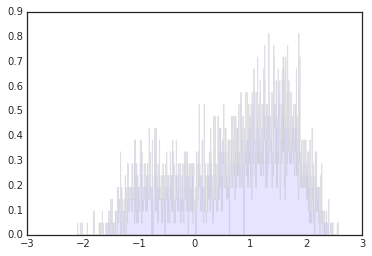

In [16]:
"""
columns = ['5GB1_FM40_T0m_TR2', '5GB1_FM40_T10m_TR3', '5GB1_FM40_T20m_TR2', '5GB1_FM40_T40m_TR1',
           '5GB1_FM40_T60m_TR1', '5GB1_FM40_T90m_TR2', '5GB1_FM40_T150m_TR1_remake', '5GB1_FM40_T180m_TR1']
"""

x1 = df2a_stand_scale["5GB1_FM40_T0m_TR2"]
x2 = df2a_stand_scale['5GB1_FM40_T10m_TR3']
x3 = df2a_stand_scale['5GB1_FM40_T20m_TR2']
x4 = df2a_stand_scale['5GB1_FM40_T40m_TR1']
x5 = df2a_stand_scale['5GB1_FM40_T60m_TR1']
x6 = df2a_stand_scale['5GB1_FM40_T90m_TR2']
x7 = df2a_stand_scale['5GB1_FM40_T150m_TR1_remake']
x8 = df2a_stand_scale['5GB1_FM40_T180m_TR1']


kwargs = dict(histtype = "stepfilled", alpha = 0.1, normed = True, bins = 1000) 

""" 
axes = plt.gca()
axes.set_xlim([0,5000])
axes.set_ylim([0,0.001])
"""

plt.hist(x1, **kwargs)
#plt.hist(x2, **kwargs)
#plt.hist(x3, **kwargs)
#plt.hist(x4, **kwargs)
#plt.hist(x5, **kwargs)
#plt.hist(x6, **kwargs)
#plt.hist(x7, **kwargs)
#plt.hist(x8, **kwargs)

Would like to plot every standard scaled histogram by itself. Found a function from stack exchagne about making histograms for every column

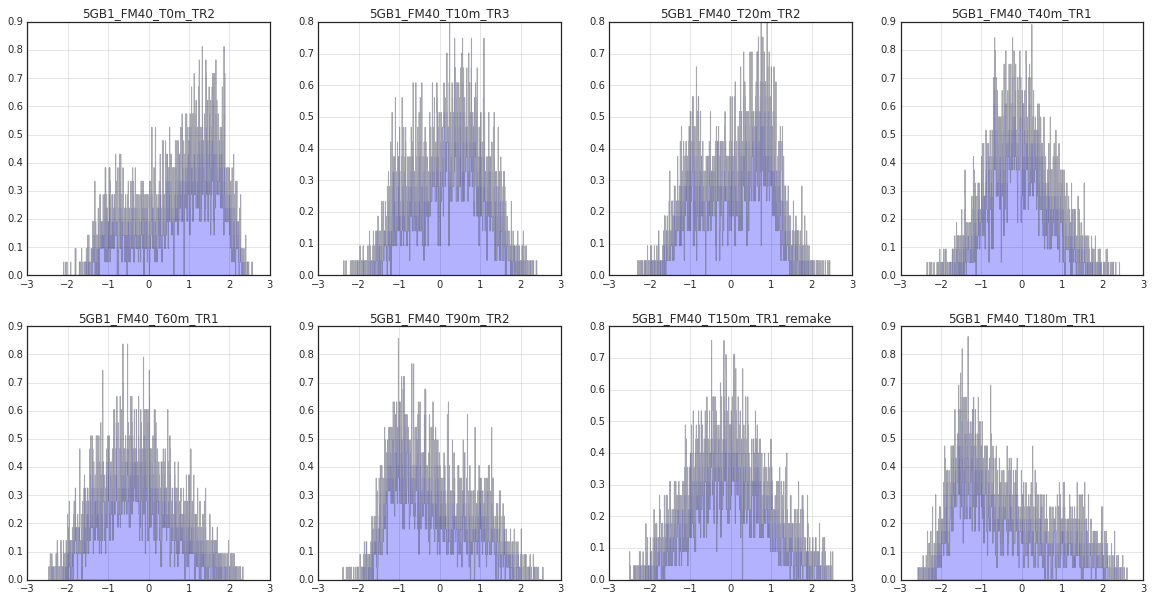

In [18]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize = (20,10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax, histtype = "stepfilled", alpha = 0.3, normed = True, bins = 1000) 
        ax.set_title(var_name)
    plt.show()

testa = df2a_stand_scale
draw_histograms(testa, testa.columns, 2, 4)

### Min/Max scale across rows and replot the histograms 

In [19]:
df2_TPM_values_T = df2_TPM_values.T #transposing the data
min_max_scalar = MinMaxScaler()

df2b_mean_max_rows = min_max_scalar.fit_transform(df2_TPM_values_T)
df2b_mean_max_rows = pd.DataFrame(df2b_mean_max_rows.T)

df2b_mean_max_rows.columns = df2_TPM_values.columns
df2b_mean_max_rows.index = df2_TPM_values.index

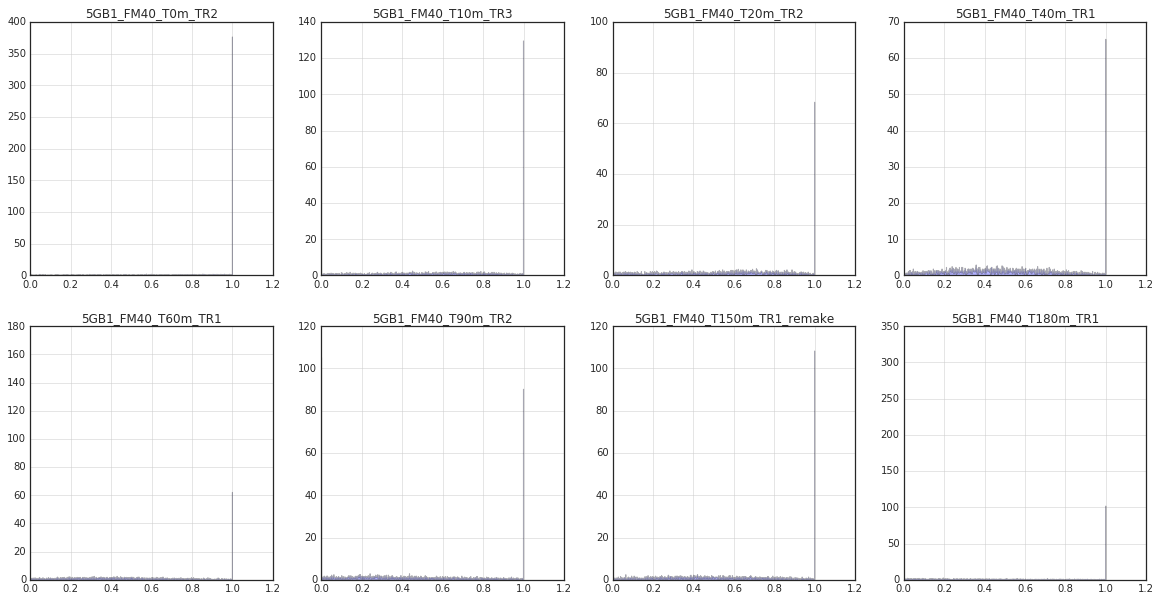

In [20]:
testb = df2b_mean_max_rows
draw_histograms(testb, testb.columns, 2, 4)

### Min/Max scale across columns and replot the histograms 

In [21]:
min_max_scalar = MinMaxScaler()

df2c_mean_max_columns = min_max_scalar.fit_transform(df2_TPM_values)
df2c_mean_max_columns = pd.DataFrame(df2c_mean_max_columns)

df2c_mean_max_columns.columns = df2_TPM_values.columns
df2c_mean_max_columns.index = df2_TPM_values.index

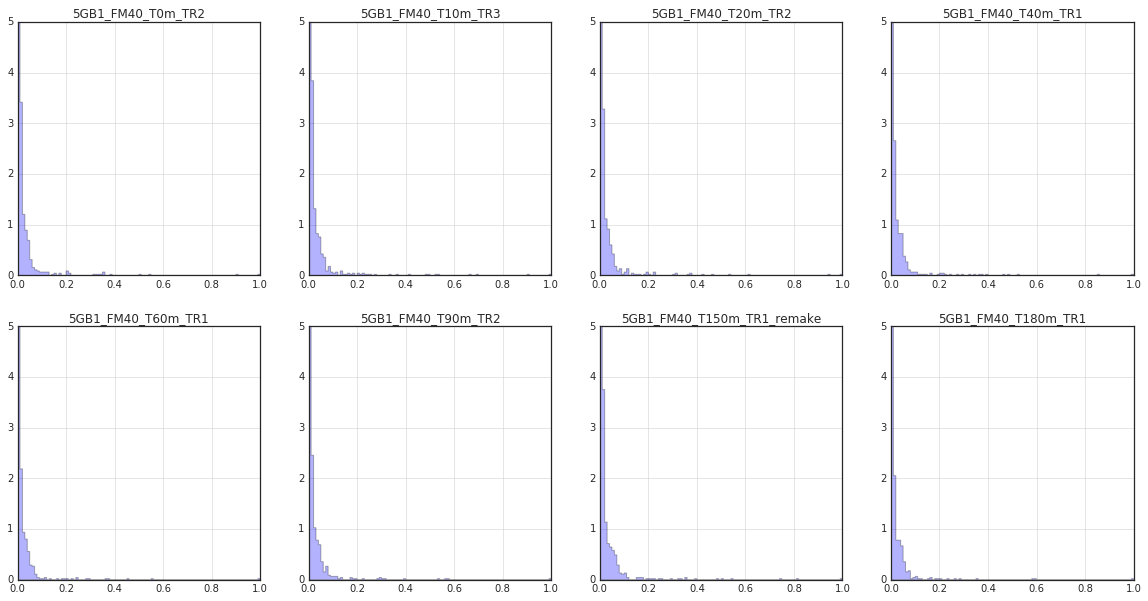

In [30]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize = (20,10))
    
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax, histtype = "stepfilled", alpha = 0.3, normed = True, bins = 100) 
        ax.set_title(var_name)
        ax.set_ylim([0, 5])
    plt.show()

testc = df2c_mean_max_columns
draw_histograms(testc, testc.columns, 2, 4)

### Code from Dave 

In [ ]:
#!/usr/bin/env python3

import math
import sys

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

df = pd.read_csv("TPM_values.csv", index_col=0)
print(df.head())

dfr = df / df.loc("5GB1_FM40_T0m_TR2")
print(dfr.head())

sys.exit()

# PCA and clustering of dfr

df.plot.hist(bins=100)
plt.savefig("hist.pdf")

#X = StandardScaler().fit_transform(df)
X = MinMaxScaler().fit_transform(df)

dfX = pd.DataFrame(X)
dfX.plot.hist(bins=100)
print(dfX.head())
plt.savefig("histX.pdf")


pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_) 
pcat = pca.transform(X)
plt.figure()
#plt.xlim(-5, 5)
#plt.ylim(-5, 5)
plt.scatter(pcat[:,0], pcat[:,1])
plt.show()
plt.savefig("pca.pdf")


for eps in [0.0001, 0.005, 0.01, 0.05, 0.075, 0.1]:
    for ms in [3, 5]:
        db = DBSCAN(eps=0.3, min_samples=3).fit(X)
        print(set(db.labels_))
        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        print('eps = %f - min_samples = %d - number of clusters: %d' % (eps, ms, n_clusters_))

In [ ]:
#will start with standard scalar - need to scale along rows, therefore transposing the data to complete standard scale. 

standard_scaler = StandardScaler()

X = standard_scaler.fit_transform(df2_TPM_values)
df_X = pd.DataFrame(X)

df_X.columns = df2_TPM_values.columns
df_X.index = df2_TPM_values.index

In [ ]:
df_X.sum(axis=1)